In [34]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [35]:
# Read data (output from FReDA_Touch_genVariables_final.do)
df = pd.read_csv('source/FReDA.csv')

In [36]:
# Add index "Id"
df['Id'] = np.arange(1, df.shape[0] + 1)
df.insert(0, 'Id', df.pop('Id'))

In [37]:
# Variables to map columns
# New values could be assigned as 'in-between' values to ease plotting and calculations
overall_options = {
    'index_options': {
        '0x': 0,
        '1-5x': 1,
        '6-10x': 2,
        '11-20x': 3,
        '21-50x': 4,
        '> 50x': 5
    },
    'sex_options': {
        'Male': 0,
        'Female': 1,
    },
    'omo_options': {
        'Not at all': 0,
        '1 to 5 times': 1,
        '6 to 10 times': 2,
        '11 to 20 times': 3,
        '21 to 50 times': 4,
        'More than 50 times': 5
    },
    'satisfaction_options': {
        '0 - Not at all satisfied': 0,
        '1': 2,
        '2': 2,
        '3': 4,
        '4': 4,
        '5': 6,
        '6': 6,
        '7': 8,
        '8': 8,
        '9': 10,
        '10 - Completely satisfied': 10
    },
    'duration_options': {
        '0-2': 1,
        '3-5': 2,
        '6-10': 3,
        '11-20': 4,
        '21+': 5,
    },
    'kids_options': {
        '0': 0,
        '1': 1,
        '2': 2,
        '3+': 3,
    },
    'Loneliness_options': {
        '1 - Not at all': 1,
        '2': 2,
        '3': 3,
        '4': 4,
        '5 - Absolutely': 5
    },
    'cohabitation-options': {
        'Separate households': 0,
        'Cohabiting': 1,
    },
    'work-options': {
        'Home': 0,
        'Part-time activity': 1,
        'Full time activity': 2,
    },
    'rel_sex-options': {
        'Different sex': 0,
        'Same sex': 1
    },
    'germany-options': {
        'East Germany': 0,
        'West Germany': 1,
    },
    'urbanization-options': {
        'Rural area': 0,
        'Town or suburb': 1,
        'City': 2,
    },
    'married-options': {
        'Not married': 0,
        'Married': 1,
    },
    'age_diff_options': {
        '> 10y. older partner': 3,
        '> 10y. younger partner': -3,
        '2-5y. older partner': 2,
        '2-5y. younger partner': -2,
        '6-10y. older partner': 1,
        '6-10y. younger partner': -1,
        'Same age': 0
    },
    'kid_age_options': {
        "0-1": 1,
        "2-5": 2,
        "6-13": 3,
        "14-17": 4,
        "18+": 5
    },
}

In [38]:
# Change column names
col_names = {
    # TOUCH-RELATED
    'omo15i1_w2b': 'Anchor Kiss Frequency',
    'omo15i2_w2b': 'Anchor Kiss Desire',
    'pomo15i1_w2b': 'Partner Kiss Frequency',
    'pomo15i2_w2b': 'Partner Kiss Desire',
    'omo16i1_w2b': 'Anchor Hold Frequency',
    'omo16i2_w2b': 'Anchor Hold Desire',
    'pomo16i1_w2b': 'Partner Hold Frequency',
    'pomo16i2_w2b': 'Partner Hold Desire',
    'omo17i1_w2b': 'Anchor Hug Frequency',
    'omo17i2_w2b': 'Anchor Hug Desire',
    'pomo17i1_w2b': 'Partner Hug Frequency',
    'pomo17i2_w2b': 'Partner Hug Desire',

    # SOCIODEMOGRAPHICS
    'sex': 'Anchor Sex',  # Female, Male, Diverse
    'psex': 'Partner Sex',  # Female, Male, Diverse
    'age': 'Anchor Age',  # int
    'page': 'Partner Age',  # int
    'workst': 'Anchor Work Status',  # Full-time activity, Part-time activity, Home
    'pworkst': 'Partner Work Status',  # Full-time activity, Part-time activity, Home
    'east': 'Anchor Region',  # East, West
    'peast': 'Partner Region',  # East, West
    'degurba': 'Anchor Urbanization',
    'pdegurba': 'Partner Urbanization',
    'isced11': 'Anchor Education',
    'pisced11': 'Partner Education',

    #PERSONALITY
    'extr': 'Anchor Extraversion',
    'pextr': 'Partner Extraversion',
    'agree': 'Anchor Agreeableness',
    'pagree': 'Partner Agreeableness',
    'consc': 'Anchor Conscientiousness',
    'pconsc': 'Partner Conscientiousness',
    'open': 'Anchor Openness',
    'popen': 'Partner Openness',
    'neur': 'Anchor Neuroticism',
    'pneur': 'Partner Neuroticism',
    'consv': 'Anchor Conservatism',
    'pconsv': 'Partner Conservatism',
    'god': 'Anchor Religiosity',
    'pgod': 'Partner Religiosity',

    #WELLBEING
    'depr': 'Anchor Depressiveness',
    'pdepr': 'Partner Depressiveness',
    'loneliness': 'Anchor Loneliness',
    'ploneliness': 'Partner Loneliness',
    'self': 'Anchor Self-esteem',
    'pself': 'Partner Self-esteem',
    'lifsat': 'Anchor Life Satisfaction',
    'plifsat': 'Partner Life Satisfaction',
    'health': 'Anchor Health',
    'phealth': 'Partner Health',

    #RELATIONSHIP
    'samesex': 'Relationship Sex',
    'reldur_class': 'Relationship Length',
    'reldur': 'Relationship Length (years)',
    'ykage_class_w2b': 'Kid Age',
    'married': 'Married',
    'cohab': 'Cohabitation',
    'nkidsliv_class': 'Kids',
    'relint': 'Anchor Communication Quality',
    'prelint': 'Partner Communication Quality',
    'relsat': 'Anchor Relationship Satisfaction',
    'prelsat': 'Partner Relationship Satisfaction',
    'confm': 'Anchor Conflict Management',
    'pconfm': 'Partner Conflict Management',
    'agediff_class': 'Age difference',
}

# Rename columns to ease understanding
df = df.rename(
    columns=col_names
)

In [39]:
# Drop unused columns
df = df.drop([
    'tf_kiss', 'ptf_kiss', 'tf_hold', 'tf_hug', 'ptf_kiss', 'ptf_hold', 'ptf_hug'], axis=1).reset_index(
    drop=True)

In [40]:
# Dummy code varibles
df['Anchor Relationship Satisfaction'] = df['Anchor Relationship Satisfaction'].map(
    overall_options["satisfaction_options"])
df['Partner Relationship Satisfaction'] = df['Partner Relationship Satisfaction'].map(
    overall_options["satisfaction_options"])
df['Anchor Life Satisfaction'] = df['Anchor Life Satisfaction'].map(overall_options["satisfaction_options"])
df['Partner Life Satisfaction'] = df['Partner Life Satisfaction'].map(overall_options["satisfaction_options"])

df['Anchor Sex'] = df['Anchor Sex'].map(overall_options["sex_options"])
df['Anchor Kiss Frequency'] = df['Anchor Kiss Frequency'].map(overall_options["omo_options"])
df['Anchor Hold Frequency'] = df['Anchor Hold Frequency'].map(overall_options["omo_options"])
df['Anchor Hug Frequency'] = df['Anchor Hug Frequency'].map(overall_options["omo_options"])
df['Anchor Kiss Desire'] = df['Anchor Kiss Desire'].map(overall_options["omo_options"])
df['Anchor Hold Desire'] = df['Anchor Hold Desire'].map(overall_options["omo_options"])
df['Anchor Hug Desire'] = df['Anchor Hug Desire'].map(overall_options["omo_options"])

df['Partner Sex'] = df['Partner Sex'].map(overall_options["sex_options"])
df['Partner Kiss Frequency'] = df['Partner Kiss Frequency'].map(overall_options["omo_options"])
df['Partner Hold Frequency'] = df['Partner Hold Frequency'].map(overall_options["omo_options"])
df['Partner Hug Frequency'] = df['Partner Hug Frequency'].map(overall_options["omo_options"])
df['Partner Kiss Desire'] = df['Partner Kiss Desire'].map(overall_options["omo_options"])
df['Partner Hold Desire'] = df['Partner Hold Desire'].map(overall_options["omo_options"])
df['Partner Hug Desire'] = df['Partner Hug Desire'].map(overall_options["omo_options"])

# df['Relationship Length'] = df['Relationship Length'].map(overall_options["duration_options"])
df['Kids'] = df['Kids'].map(overall_options['kids_options'])

df['Anchor Loneliness'] = df['Anchor Loneliness'].map(overall_options['Loneliness_options'])
df['Partner Loneliness'] = df['Partner Loneliness'].map(overall_options['Loneliness_options'])

df['Cohabitation'] = df['Cohabitation'].map(overall_options['cohabitation-options'])

df['Anchor Work Status'] = df['Anchor Work Status'].map(overall_options['work-options'])
df['Partner Work Status'] = df['Partner Work Status'].map(overall_options['work-options'])

df['Anchor Region'] = df['Anchor Region'].map(overall_options['germany-options'])
df['Partner Region'] = df['Partner Region'].map(overall_options['germany-options'])

df['Anchor Urbanization'] = df['Anchor Urbanization'].map(overall_options['urbanization-options'])
df['Partner Urbanization'] = df['Partner Urbanization'].map(overall_options['urbanization-options'])

df['Married'] = df['Married'].map(overall_options['married-options'])

df['Relationship Sex'] = df['Relationship Sex'].map(overall_options['rel_sex-options'])

df['Age difference'] = df['Age difference'].map(overall_options['age_diff_options'])

df['Kid Age'] = df['Kid Age'].map(overall_options['kid_age_options']).fillna(0)

In [41]:
# Remove nan in touch variables (since they are our target)
col_names = [
    'Anchor Kiss Frequency',
    'Anchor Kiss Desire',
    'Partner Kiss Frequency',
    'Partner Kiss Desire',
    'Anchor Hold Frequency',
    'Anchor Hold Desire',
    'Partner Hold Frequency',
    'Partner Hold Desire',
    'Anchor Hug Frequency',
    'Anchor Hug Desire',
    'Partner Hug Frequency',
    'Partner Hug Desire',
]
df = df.dropna(subset=col_names).reset_index(drop=True)

In [42]:
# Calculate mean Frequency
df['Anchor Frequency'] = (df[['Anchor Kiss Frequency', 'Anchor Hold Frequency', 'Anchor Hug Frequency']].
                                   mean(axis=1))
df['Partner Frequency'] = (df[['Partner Kiss Frequency', 'Partner Hold Frequency', 'Partner Hug Frequency']].
                                    mean(axis=1))
# df['Couple Frequency'] = (df[['Anchor Frequency', 'Partner Frequency']].
#                                    mean(axis=1))

# Calculate mean Desire
df['Anchor Desire'] = (df[['Anchor Kiss Desire', 'Anchor Hold Desire', 'Anchor Hug Desire']].
                               mean(axis=1))
df['Partner Desire'] = (df[['Partner Kiss Desire', 'Partner Hold Desire', 'Partner Hug Desire']].
                                mean(axis=1))
# df['Couple Desire'] = (df[['Anchor Desire', 'Partner Desire']].
#                                mean(axis=1))

# Calculate individual differences
df['Anchor Kiss Divergence'] = df['Anchor Kiss Desire'] - df['Anchor Kiss Frequency']
df['Anchor Hold Divergence'] = df['Anchor Hold Desire'] - df['Anchor Hold Frequency']
df['Anchor Hug Divergence'] = df['Anchor Hug Desire'] - df['Anchor Hug Frequency']

df['Partner Kiss Divergence'] = df['Partner Kiss Desire'] - df['Partner Kiss Frequency']
df['Partner Hold Divergence'] = df['Partner Hold Desire'] - df['Partner Hold Frequency']
df['Partner Hug Divergence'] = df['Partner Hug Desire'] - df['Partner Hug Frequency']

In [43]:
# make sure data is correct
df = df[(df['Anchor Age'] != -7) & (df['Partner Age'] != -7)].reset_index(drop=True)

In [44]:
# Optional, drop every NaN
# df.dropna()

In [45]:
df['Anchor Divergence'] = df['Anchor Desire'] - df['Anchor Frequency']
df['Partner Divergence'] = df['Partner Desire'] - df['Partner Frequency']
# df['Couple Divergence'] = df['Couple Desire'] - df['Couple Frequency']

In [46]:
# I am okay, and my partner is okay
condition1 = (
        (df['Anchor Divergence'] == 0) & (df['Partner Divergence'] == 0)
)

# I am deprived and my partner is okay
condition2 = (
        (df['Anchor Divergence'] > 0) & (df['Partner Divergence'] == 0)
)

# I am deprived and my partner is also deprived
condition3 = (
        (df['Anchor Divergence'] > 0) & (df['Partner Divergence'] > 0)
)

# I am deprived but my partner is saturated
condition4 = (
        (df['Anchor Divergence'] > 0) & (df['Partner Divergence'] < 0)
)

# I am saturated and my partner is okay
condition5 = (
        (df['Anchor Divergence'] < 0) & (df['Partner Divergence'] == 0)
)

# I am saturated and my partner is also saturated
condition6 = (
        (df['Anchor Divergence'] < 0) & (df['Partner Divergence'] < 0)
)

# I am okay but my partner is deprived
condition7 = (
        (df['Anchor Divergence'] == 0) & (df['Partner Divergence'] > 0)
)

# I am okay but my partner is saturated
condition8 = (
        (df['Anchor Divergence'] == 0) & (df['Partner Divergence'] < 0)
)

# I am saturated but my partner is deprived
condition9 = (
        (df['Anchor Divergence'] < 0) & (df['Partner Divergence'] > 0)
)

condition10 = (
        (df['Anchor Divergence'] < 0) & (df['Partner Divergence'] > 0)
        |
        (df['Anchor Divergence'] > 0) & (df['Partner Divergence'] < 0)
)

df.loc[condition1, 'Group1'] = 'SubGroup1'
df.loc[condition2, 'Group1'] = 'SubGroup2'
df.loc[condition3, 'Group1'] = 'SubGroup3'
df.loc[condition4, 'Group1'] = 'SubGroup4'
df.loc[condition5, 'Group1'] = 'SubGroup5'
df.loc[condition6, 'Group1'] = 'SubGroup6'
df.loc[condition7, 'Group1'] = 'SubGroup7'
df.loc[condition8, 'Group1'] = 'SubGroup8'
df.loc[condition9, 'Group1'] = 'SubGroup9'
# df.loc[condition10, 'Group1'] = 'SubGroup10'

In [47]:
# 1- How many are in Agreement with touch
df.groupby(by=["Group1"]).count()["Id"]

Group1
SubGroup1    1921
SubGroup2    1042
SubGroup3    1701
SubGroup4     146
SubGroup5     142
SubGroup6      45
SubGroup7    1428
SubGroup8     191
SubGroup9     184
Name: Id, dtype: int64

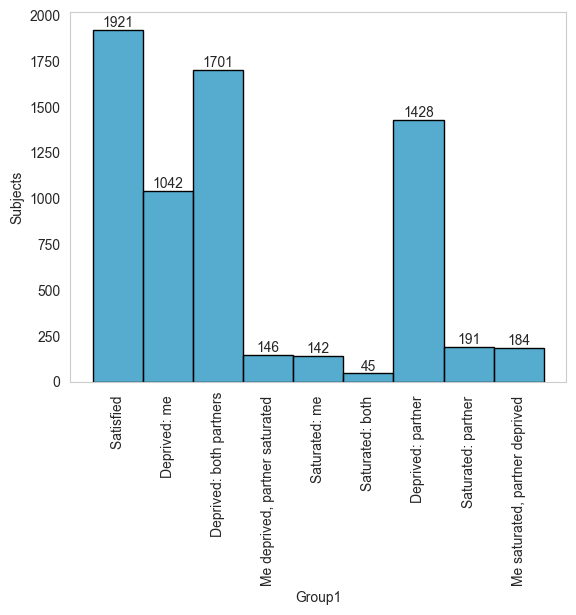

In [48]:
group_labels = [
    'Satisfied',
    'Deprived: me',
    'Deprived: both partners',
    'Me deprived, partner saturated',
    'Saturated: me',
    'Saturated: both partners',
    'Deprived: partner',
    'Saturated: partner',
    'Me saturated, partner deprived'
]

df['Group1'] = pd.Categorical(
    df['Group1'], ['SubGroup1',  # Satisfied
                   'SubGroup2',  # Deprived: me
                   'SubGroup3',  # Deprived: both
                   'SubGroup4',  # Me deprived, partner saturated
                   'SubGroup5',  # Saturated: me
                   'SubGroup6',  # Saturated: both
                   'SubGroup7',  # Deprived: partner
                   'SubGroup8',  # Saturated: partner
                   'SubGroup9'  # Me saturated, partner deprived
                   ]
)

ax = sns.histplot(
    data=df, x='Group1',
    element='bars',
    binwidth=0.5,
    color='#1d91c0',
    common_norm=False,
    multiple="dodge",
    linewidth=1,
    edgecolor='black',
)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height,
        int(height),
        ha="center", va="bottom"
    )
plt.grid(False)
plt.ylabel("Subjects")
ti = plt.xticks(rotation=90, ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8], labels=group_labels)

In [49]:
# 1- How many (%) are in Agreement with touch
df.groupby(by=["Group1"]).count()["Id"] / len(df) * 100

Group1
SubGroup1    28.250000
SubGroup2    15.323529
SubGroup3    25.014706
SubGroup4     2.147059
SubGroup5     2.088235
SubGroup6     0.661765
SubGroup7    21.000000
SubGroup8     2.808824
SubGroup9     2.705882
Name: Id, dtype: float64

In [50]:
condition1 = (
        (df['Anchor Divergence'] == 0) & (df['Partner Divergence'] == 0)
)

condition2 = (
        (df['Anchor Divergence'] > 0) & (df['Partner Divergence'] == 0) |
        (df['Anchor Divergence'] == 0) & (df['Partner Divergence'] > 0)
)

condition3 = (
        (df['Anchor Divergence'] < 0) & (df['Partner Divergence'] == 0) |
        (df['Anchor Divergence'] == 0) & (df['Partner Divergence'] < 0)
)

condition4 = (
        (df['Anchor Divergence'] > 0) & (df['Partner Divergence'] > 0)
)

condition5 = (
        (df['Anchor Divergence'] < 0) & (df['Partner Divergence'] < 0)
)

condition6 = (
        (df['Anchor Divergence'] > 0) & (df['Partner Divergence'] < 0) |
        (df['Anchor Divergence'] < 0) & (df['Partner Divergence'] > 0)
)

df.loc[condition1, 'Group2'] = 'Couple Satisfaction'
df.loc[condition2, 'Group2'] = 'One-sided Deprivation'
df.loc[condition3, 'Group2'] = 'One-sided Saturation'
df.loc[condition4, 'Group2'] = 'Couple Deprivation'
df.loc[condition5, 'Group2'] = 'Couple Saturation'
df.loc[condition6, 'Group2'] = 'Couple Dissatisfaction'

In [51]:
condition1 = (
    (df['Group2'] == 'Couple Satisfaction')
)
condition2 = (
        (df['Group2'] == 'One-sided Deprivation') |
        (df['Group2'] == 'Couple Deprivation')
)
condition3 = (
        (df['Group2'] == 'One-sided Saturation') |
        (df['Group2'] == 'Couple Saturation')
)
condition4 = (
    (df['Group2'] == 'Couple Dissatisfaction')
)
df.loc[condition1, 'Group3'] = 'Couple Satisfaction'
df.loc[condition2, 'Group3'] = 'Couple Deprivation'
df.loc[condition3, 'Group3'] = 'Couple Saturation'
df.loc[condition4, 'Group3'] = 'Couple Mixed'

(0.0, 2800.0)

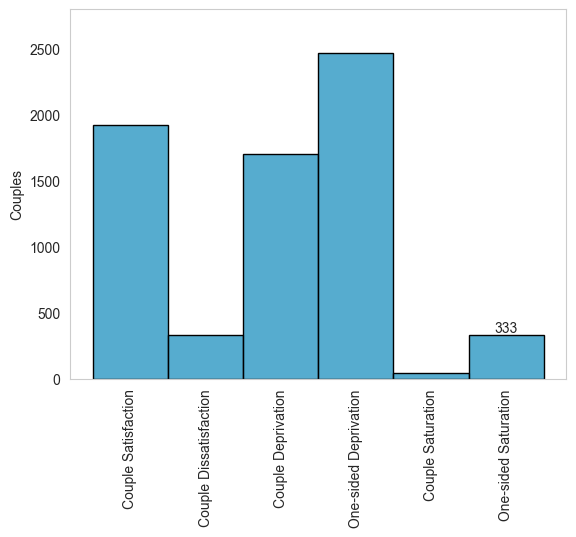

In [52]:
df['Group2'] = pd.Categorical(
    df['Group2'], ['Couple Satisfaction',
                   'Couple Dissatisfaction',
                   'Couple Deprivation',
                   'One-sided Deprivation',
                   'Couple Saturation',
                   'One-sided Saturation',
                   ]
)
ax = sns.histplot(data=df, x='Group2',
                  element='bars',
                  binwidth=0.5,
                  color='#1d91c0',
                  common_norm=False,
                  multiple="dodge",
                  linewidth=1,
                  edgecolor='black',
                  )
for p in ax.patches:
    height = p.get_height()
ax.text(
    p.get_x() + p.get_width() / 2.,
    height,
    int(height),
    ha="center", va="bottom"
)
plt.grid(False)
plt.ylabel("Couples")
plt.xlabel("")
plt.xticks(rotation=90, )
plt.ylim(0, 2800)

# plt.savefig('output/img/subgroup_histogram.png', dpi=350, transparent=False, bbox_inches='tight')

In [53]:
df["Group2"].value_counts()

Group2
One-sided Deprivation     2470
Couple Satisfaction       1921
Couple Deprivation        1701
One-sided Saturation       333
Couple Dissatisfaction     330
Couple Saturation           45
Name: count, dtype: int64

In [54]:
df.groupby(by=["Group2"]).count()["Id"] / len(df) * 100

Group2
Couple Satisfaction       28.250000
Couple Dissatisfaction     4.852941
Couple Deprivation        25.014706
One-sided Deprivation     36.323529
Couple Saturation          0.661765
One-sided Saturation       4.897059
Name: Id, dtype: float64

In [55]:
df["Anchor Perception"] = "Satisfied"
df["Partner Perception"] = "Satisfied"

temp1 = df["Anchor Divergence"]
df.loc[temp1 > 0, "Anchor Perception"] = "Deprived"
df.loc[temp1 < 0, "Anchor Perception"] = "Saturated"

temp2 = df["Partner Divergence"]
df.loc[temp2 > 0, "Partner Perception"] = "Deprived"
df.loc[temp2 < 0, "Partner Perception"] = "Saturated"

In [56]:
df.to_csv('source/FReDA3.csv', index=False)

In [57]:
couple_vars = [
    'Id',
    'Relationship Sex',
    'Relationship Length',
    'Relationship Length (years)',
    'Cohabitation',
    'Kids',
    'Married',
    'Age difference',
    'Group1',
    'Group2',
    'Group3'
]

# --- Separate the Anchor and Partner data ---
anchor_df = df.filter(regex='^Anchor |^Id$').copy()
partner_df = df.filter(regex='^Partner |^Id$').copy()

# --- Rename columns (remove prefixes) ---
anchor_df.columns = anchor_df.columns.str.replace('Anchor ', '', regex=False)
partner_df.columns = partner_df.columns.str.replace('Partner ', '', regex=False)

# --- Add role labels ---
anchor_df['Role'] = 'Anchor'
partner_df['Role'] = 'Partner'

# --- Rename Id to CoupleId before combining ---
anchor_df = anchor_df.rename(columns={'Id': 'CoupleId'})
partner_df = partner_df.rename(columns={'Id': 'CoupleId'})

# --- Combine Anchor and Partner rows ---
df_long = pd.concat([anchor_df, partner_df], ignore_index=True)

# --- Merge couple-level data ---
df_long = df_long.merge(df[couple_vars].rename(columns={'Id': 'CoupleId'}), on='CoupleId', how='left')

# Optional: reorder columns
cols = ['CoupleId', 'Role'] + [c for c in df_long.columns if c not in ['CoupleId', 'Role']]
df_long = df_long[cols]

In [58]:
# df_long.to_csv('source/FReDA4.csv', index=False)

([0, 1, 2, 3],
 [Text(0, 0, 'Satisfied'),
  Text(1, 0, 'Deprived_One'),
  Text(2, 0, 'Mixed_Couples'),
  Text(3, 0, 'Saturated_One')])

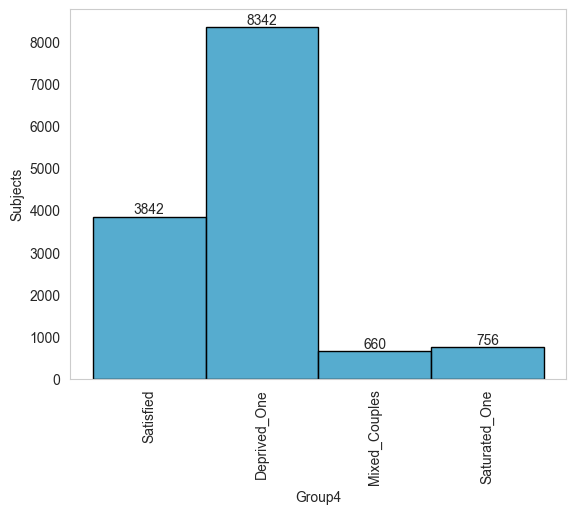

In [65]:
# Satisfied
df_long.loc[df_long['Group1'] == 'SubGroup1', 'Group4'] = 'Satisfied'

# Deprived groups
df_long.loc[df_long['Group1'] == 'SubGroup3', 'Group4'] = 'Deprived_One'
df_long.loc[df_long['Group2'] == 'One-sided Deprivation', 'Group4'] = 'Deprived_One'

# Saturated groups
df_long.loc[df_long['Group1'] == 'SubGroup6', 'Group4'] = 'Saturated_One'
df_long.loc[df_long['Group2'] == 'One-sided Saturation', 'Group4'] = 'Saturated_One'

# Mixed groups
df_long.loc[df_long['Group1'] == 'SubGroup4', 'Group4'] = 'Mixed_Couples'
df_long.loc[df_long['Group1'] == 'SubGroup9', 'Group4'] = 'Mixed_Couples'

ax = sns.histplot(data=df_long, x='Group4',
                  element='bars',
                  binwidth=0.5,
                  color='#1d91c0',
                  common_norm=False,
                  multiple="dodge",
                  linewidth=1,
                  edgecolor='black',
                  )
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height,
        int(height),
        ha="center", va="bottom"
    )
plt.grid(False)
plt.ylabel("Subjects")

plt.xticks(rotation=90)

In [60]:
df.groupby(by=["Group2"]).count()["Id"] / len(df) * 100

Group1
SubGroup1    28.250000
SubGroup2    15.323529
SubGroup3    25.014706
SubGroup4     2.147059
SubGroup5     2.088235
SubGroup6     0.661765
SubGroup7    21.000000
SubGroup8     2.808824
SubGroup9     2.705882
Name: Id, dtype: float64

In [61]:
def val_to_category(val):
    if val < 0.5:
        return 0
    elif val < 2:
        return 1
    elif val < 3:
        return 2
    elif val < 4:
        return 3
    elif val < 5:
        return 4
    else:
        return 5


df_long['Frequency'] = df_long['Frequency'].apply(val_to_category)
df_long['Desire'] = df_long['Desire'].apply(val_to_category)

overall = (
    df_long['Frequency']
    .value_counts()
    .sort_index()
    .rename_axis('Frequency')
    .reset_index(name='Count')
)
overall['Percent'] = (overall['Count'] / overall['Count'].sum()) * 100

cross = pd.crosstab(df_long['Group1'], df_long['Frequency'], margins=False)
cross_percent = cross.div(cross.sum(axis=1), axis=0) * 100
cross_combined = cross.astype(str) + " (" + cross_percent.round(1).astype(str) + "%)"

In [62]:
df_summary = (
    df_long.groupby('Group1')['Divergence']
    .agg(['mean', 'std', 'median'])
    .reset_index()
)
print(df_summary)

      Group1      mean       std    median
0  SubGroup1  0.000000  0.000000  0.000000
1  SubGroup2  0.476168  0.736260  0.166667
2  SubGroup3  1.057123  0.805156  1.000000
3  SubGroup4  0.034247  1.229477  0.000000
4  SubGroup5 -0.570423  1.061946 -0.166667
5  SubGroup6 -1.588889  1.351976 -1.333333
6  SubGroup7  0.463819  0.694917  0.166667
7  SubGroup8 -0.492147  0.869309 -0.166667
8  SubGroup9  0.052536  1.271364  0.000000
